# Cardiovascular Disease vs Determinants

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Resource files
CD_data_path = "Resources/Cardiovascular_Disease_Data.csv"
census_data_path = "Resources/2018_Census_Data.csv"

# Read the Cardiovascular Disease data and Census data
CD_data = pd.read_csv(CD_data_path)
census_data = pd.read_csv(census_data_path)

# State name to abbreviated version
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# Cleaning Cardiovascular Data
CD_data = CD_data[CD_data["Year"]=="2018"] # Grabbing rows with the Year 2018 only
CD_data = CD_data[["Year", 
                   "LocationAbbr", 
                   "LocationDesc", 
                   "Topic", 
                   "Data_Value", 
                   "Stratification1"]] # Grabbing relevant columns
CD_data.columns = ["Year", 
                   "State", 
                   "County", 
                   "Disease Type", 
                   "Mortality per 100k", 
                   "Age Group"] # Renaming columns
CD_data["County, State"] = CD_data["County"] + " County, " + CD_data["State"] # Create a column that will be used to merge with other dataset
CD_data = CD_data[["Year", "County, State", "State", "Disease Type", "Mortality per 100k", "Age Group"]]

# Cleaning Census Data
census_data = census_data[["STATE",
                           "COUNTY",
                           "ACS_MEDIAN_HH_INC",
                           "ACS_PCT_COLLEGE_ASSOCIATE_DGR",
                           "ACS_PCT_BACHELOR_DGR",
                           "ACS_PCT_GRADUATE_DGR",
                           "ACS_PCT_HS_GRADUATE",
                           "ACS_PCT_LT_HS",
                           "ACS_PCT_MEDICARE_ONLY",
                           "ACS_PCT_PRIVATE_ANY",
                           "ACS_PCT_UNINSURED"]] # Grabbing relevant columns
census_data.columns = ["State",
                       "County",
                       "County Median Income",
                       "% College/Associate's Degree",
                       "% Bachelor Degree",
                       "% Graduate Degree",
                       "% Only HS Degree",
                       "% less than a HS Degree",
                       "% Medicare Only",
                       "% Private Insurance Only",
                       "% Uninsured"] # Renaming columns
census_data["County, State"] = census_data["County"] + ", " + census_data["State"].replace(us_state_to_abbrev) # Create a column that will be used to merge with other dataset
census_data = round(census_data.groupby("County, State").mean(), 3) # Average rows with same counties

df = pd.merge(CD_data, census_data, how = "left", left_on = "County, State", right_index = True).dropna(axis=0) # Merging cardiovascular data and census data
df_state_income = df.groupby("State")["County Median Income"].mean().rename("State Median Income") # Finding median income by state
df = pd.merge(df, df_state_income, how = "left", left_on = "State", right_index = True) # Adding column to main dataframe
df.head()

C:\Users\didie\AppData\Local\Temp\ipykernel_66580\2026505708.py:12: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  CD_data = pd.read_csv(CD_data_path)
C:\Users\didie\AppData\Local\Temp\ipykernel_66580\2026505708.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  census_data = pd.read_csv(census_data_path)
C:\Users\didie\AppData\Local\Temp\ipykernel_66580\2026505708.py:117: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  census_data = round(census_data.groupby("County, State").mean(), 3) # Average rows with same counties


,Year,"County, State",State,Disease Type,Mortality per 100k,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured,State Median Income
21,2018,"Autauga County, AL",AL,Stroke,23.5,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,41685.122448
42,2018,"Autauga County, AL",AL,Coronary Heart Disease,87.9,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,41685.122448
62,2018,"Autauga County, AL",AL,Stroke,368.6,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,41685.122448
82,2018,"Autauga County, AL",AL,Coronary Heart Disease,689.9,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,41685.122448
115,2018,"Baldwin County, AL",AL,Stroke,18.1,Ages 35-64 years,56782.71,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276,41685.122448


## Exploratory Data Analysis (EDA)

### Summary Statistics for Mortality Rate by Age Group and Disease Type

In [88]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
]

df_stats = df.groupby(["Disease Type", "Age Group"])["Mortality per 100k"].agg(func=stats) # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

Mean  Median  \
Disease Type           Age Group                                     
Coronary Heart Disease Ages 35-64 years          71.033420   64.40   
                       Ages 65 years and older  625.813633  600.75   
Stroke                 Ages 35-64 years          17.060259   15.40   
                       Ages 65 years and older  269.255096  263.40   

                                                       Std  Minimum  Maximum  
Disease Type           Age Group                                              
Coronary Heart Disease Ages 35-64 years          31.070344     13.3    300.7  
                       Ages 65 years and older  175.593108    207.1   1609.8  
Stroke                 Ages 35-64 years           6.468517      5.6     48.1  
                       Ages 65 years and older   49.692388    107.9    596.4

### Distribution of Mortality Rate by Age Group and Disease Type

#### Disease Type: Coronary Heart Disease

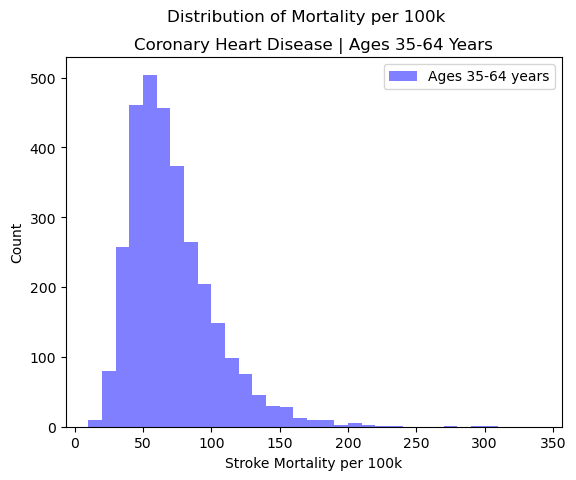

In [73]:
# Ages 35-64 years
bins = list(range(10, 350, 10))
plt.hist(df[(df["Age Group"] == "Ages 35-64 years") & (df["Disease Type"] == "Coronary Heart Disease")]["Mortality per 100k"], bins, alpha = 0.5, color = "blue", label = "Ages 35-64 years")
plt.xlabel("Stroke Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Coronary Heart Disease | Ages 35-64 Years")
plt.legend()

#### Disease Type: Stroke

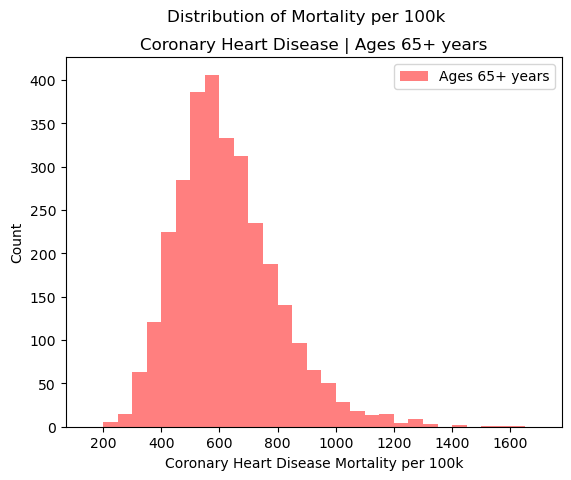

In [89]:
# Ages 65+ years
bins = list(range(150, 1750, 50))
plt.hist(df[(df["Age Group"] == "Ages 65 years and older") & (df["Disease Type"] == "Coronary Heart Disease")]["Mortality per 100k"], bins, alpha = 0.5, color = "red", label = "Ages 65+ years")
plt.xlabel("Coronary Heart Disease Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Coronary Heart Disease | Ages 65+ years")
plt.legend()

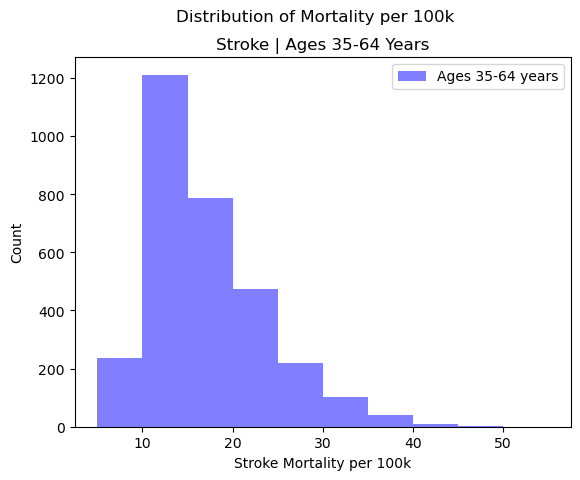

In [90]:
# Ages 35-64 years
bins = list(range(5, 60, 5))
plt.hist(df[(df["Age Group"] == "Ages 35-64 years") & (df["Disease Type"] == "Stroke")]["Mortality per 100k"], bins, alpha = 0.5, color = "blue", label = "Ages 35-64 years")
plt.xlabel("Stroke Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Stroke | Ages 35-64 Years")
plt.legend()

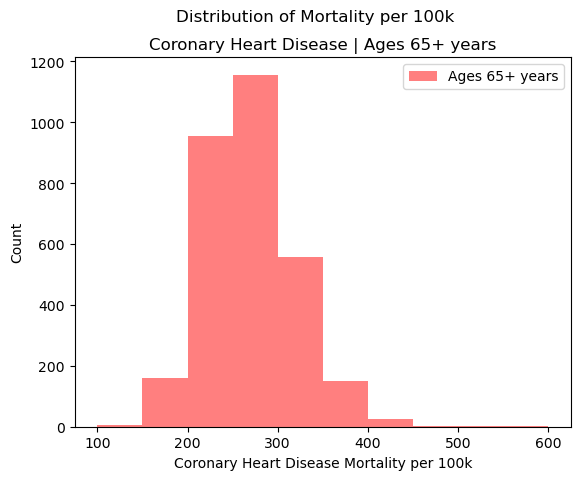

In [72]:
# Ages 65+ years
bins = list(range(100, 650, 50))
plt.hist(df[(df["Age Group"] == "Ages 65 years and older") & (df["Disease Type"] == "Stroke")]["Mortality per 100k"], bins, alpha = 0.5, color = "red", label = "Ages 65+ years")
plt.xlabel("Coronary Heart Disease Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Stroke | Ages 65+ years")
plt.legend()

### Summary Statistics for County Median Income

In [190]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["County Median Income"]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
Median Income,52286.678756,50383.75,14119.619711,20356.0,134712.703


### Distribution of County Median Income

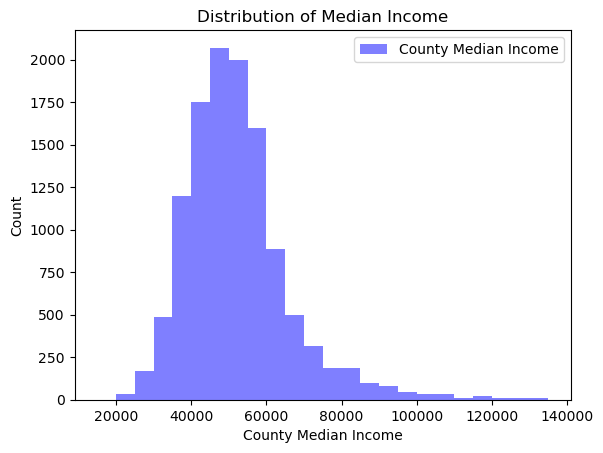

In [40]:
bins = list(range(15000, 140000, 5000))
plt.hist(df["County Median Income"], bins, alpha = 0.5, color = "blue", label = "County Median Income")
plt.xlabel("County Median Income")
plt.ylabel("Count")
plt.title("Distribution of Median Income")
plt.legend()

### Distribution of State Median Income

Text(0.5, 1.0, 'Distribution of Median Income')

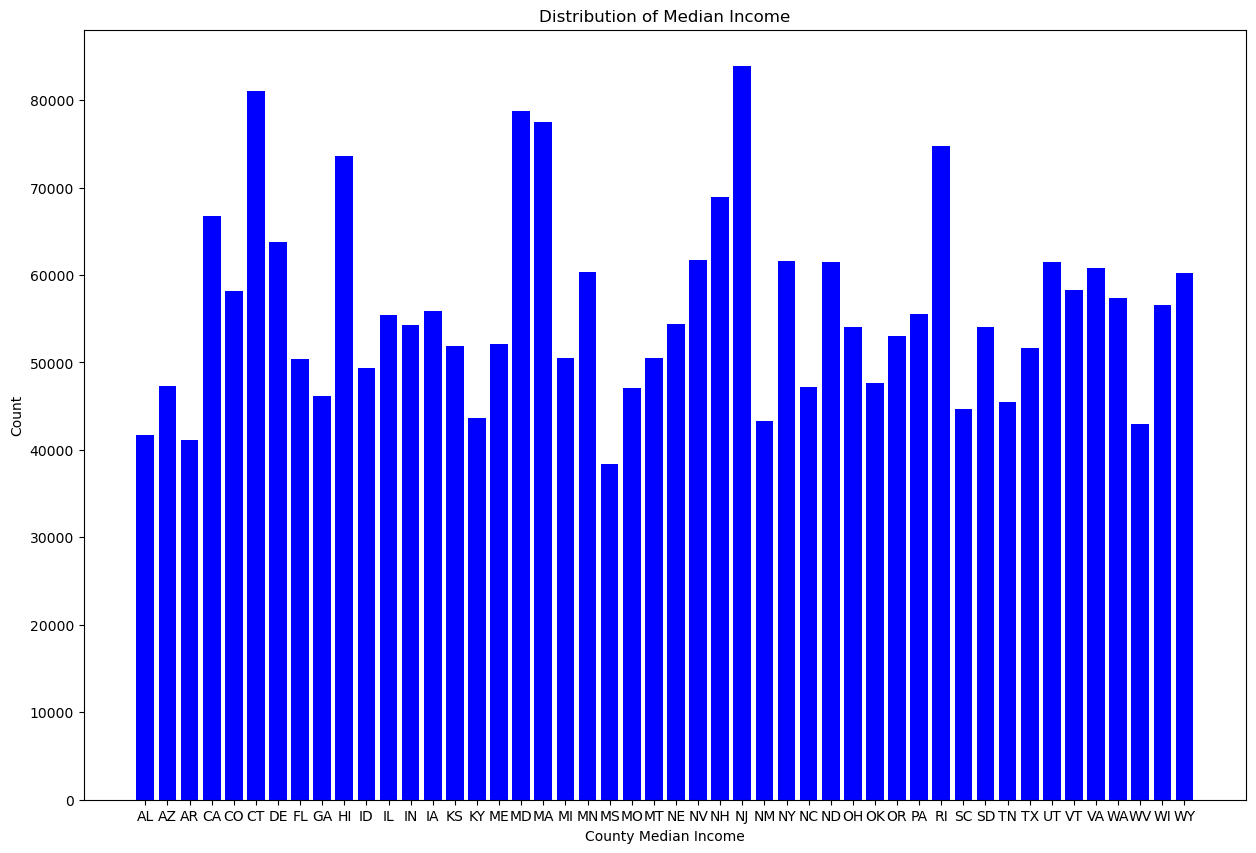

In [51]:
plt.figure(figsize = (15, 10))
plt.bar(df["State"], df["State Median Income"], alpha = 0.5, color = "blue", label = "State Median Income", align = "center")
plt.xlabel("County Median Income")
plt.ylabel("Count")
plt.title("Distribution of Median Income")

### Summary Statistics for Education

In [212]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["% College/Associate's Degree", 
               "% Bachelor Degree", 
               "% Graduate Degree", 
               "% Only HS Degree", 
               "% less than a HS Degree"
              ]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
% College/Associate's Degree,30.736011,30.622,5.095445,11.210,47.980
% Bachelor Degree,13.772744,12.768,5.486197,2.465,46.067
% Graduate Degree,7.476385,6.139,4.279798,0.580,40.300
% Only HS Degree,34.450530,34.799,7.130146,7.741,55.410
% less than a HS Degree,13.564333,12.331,6.207610,1.410,47.637


### Distribution of Education

Text(0, 0.5, 'Percent')

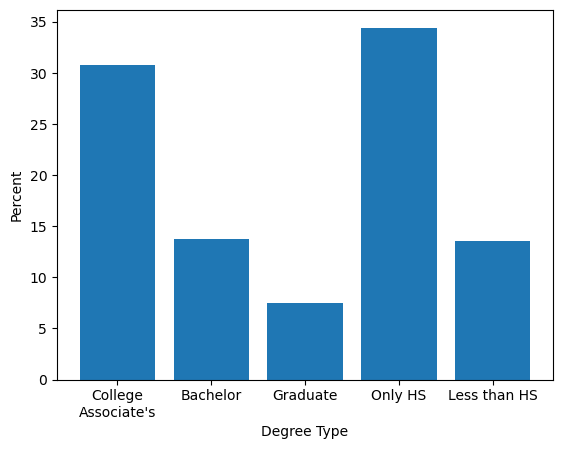

In [213]:
plt.bar(df_stats.index, df_stats["Mean"])
plt.xticks([0, 1, 2, 3, 4], ["College\nAssociate's", "Bachelor", "Graduate", "Only HS", "Less than HS"])
plt.xlabel("Degree Type")
plt.ylabel("Percent")

### Summary Statistics for Insurance

In [214]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["% Medicare Only", 
               "% Private Insurance Only", 
               "% Uninsured"
              ]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
% Medicare Only,6.063525,5.789,1.914337,1.512,16.145
% Private Insurance Only,57.833914,58.309,10.414717,12.940,85.620
% Uninsured,9.989589,9.114,4.913097,1.686,42.380


### Distribution of Insurance

Text(0, 0.5, 'Percent')

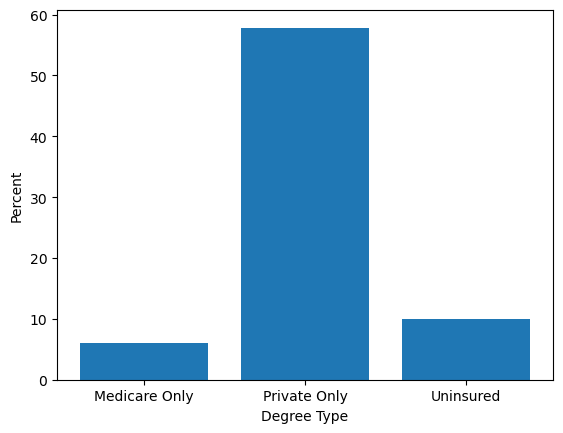

In [216]:
plt.bar(df_stats.index, df_stats["Mean"])
plt.xticks([0, 1, 2], ["Medicare Only", "Private Only", "Uninsured"])
plt.xlabel("Degree Type")
plt.ylabel("Percent")

## DataFrame Analysis: Linear Regression Equations & R-values

### Compared to Education

In [116]:
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]
education_level = ["% College/Associate's Degree", 
                   "% Bachelor Degree", 
                   "% Graduate Degree", 
                   "% Only HS Degree", 
                   "% less than a HS Degree"]

equations = []
r_values = []
educations = []
diseases = []
ages = []

for education in education_level:
    for disease in disease_type:
        for age in age_group:
            data = df[(df["Disease Type"] == disease) & (df["Age Group"] == age)].groupby("State")
            x = data[education].mean()
            y = data["Mortality per 100k"].mean()
            (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
            line_eq = str(round(slope,5)) + "x + " + str(round(intercept,2))
            row_index.append(f"{education}, {disease}, {age}")
            equations.append(line_eq)
            r_values.append(rvalue)
            educations.append(education)
            diseases.append(disease)
            ages.append(age)
            
tuples = list(zip(*[educations, diseases, ages]))
index = pd.MultiIndex.from_tuples(tuples, names=["Education Level", "Disease Type", "Age Group"])
data = {"Linear EQs": equations, "r-values": r_values}
pd.DataFrame(data = data, index = index)

Linear EQs  \
Education Level              Disease Type           Age Group                                      
% College/Associate's Degree Coronary Heart Disease Ages 35-64 years          -1.45606x + 107.95   
                                                    Ages 65 years and older    -8.38705x + 868.5   
                             Stroke                 Ages 35-64 years            -0.2129x + 21.83   
                                                    Ages 65 years and older   -1.07874x + 290.08   
% Bachelor Degree            Coronary Heart Disease Ages 35-64 years          -4.38704x + 129.81   
                                                    Ages 65 years and older  -13.00624x + 808.17   
                             Stroke                 Ages 35-64 years           -1.02971x + 30.94   
                                                    Ages 65 years and older   -6.39678x + 354.36   
% Graduate Degree            Coronary Heart Disease Ages 35-64 years            -3.76337x + 95.9   
                                                    Ages 65 years and older     -8.9975x + 688.9   
                             Stroke                 Ages 35-64 years           -0.90735x + 23.19   
                                                    Ages 65 years and older    -5.75571x + 307.4   
% Only HS Degree             Coronary Heart Disease Ages 35-64 years           2.95547x + -34.47   
                                                    Ages 65 years and older   12.37624x + 202.19   
                             Stroke                 Ages 35-64 years             0.46132x + 0.04   
                                                    Ages 65 years and older    3.51262x + 141.12   
% less than a HS Degree      Coronary Heart Disease Ages 35-64 years            3.92779x + 15.18   
                                                    Ages 65 years and older    8.79275x + 502.72   
                             Stroke                 Ages 35-64 years              1.15484x + 1.2   
                                                    Ages 65 years and older    5.86776x + 185.34   

                                                                             R Values  
Education Level              Disease Type           Age Group                          
% College/Associate's Degree Coronary Heart Disease Ages 35-64 years        -0.290648  
                                                    Ages 65 years and older -0.332030  
                             Stroke                 Ages 35-64 years        -0.163666  
                                                    Ages 65 years and older -0.121698  
% Bachelor Degree            Coronary Heart Disease Ages 35-64 years        -0.781434  
                                                    Ages 65 years and older -0.464556  
                             Stroke                 Ages 35-64 years        -0.706356  
                                                    Ages 65 years and older -0.651097  
% Graduate Degree            Coronary Heart Disease Ages 35-64 years        -0.592920  
                                                    Ages 65 years and older -0.281880  
                             Stroke                 Ages 35-64 years        -0.550532  
                                                    Ages 65 years and older -0.513855  
% Only HS Degree             Coronary Heart Disease Ages 35-64 years         0.683036  
                                                    Ages 65 years and older  0.574776  
                             Stroke                 Ages 35-64 years         0.410587  
                                                    Ages 65 years and older  0.464879  
% less than a HS Degree      Coronary Heart Disease Ages 35-64 years         0.722132  
                                                    Ages 65 years and older  0.323127  
                             Stroke                 Ages 35-64 years         0.817671  
                                     

### Compared to Insurance

In [126]:
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]
insurance_type = ["% Medicare Only",
                   "% Private Insurance Only",
                   "% Uninsured"]

equations = []
r_values = []
insurances = []
diseases = []
ages = []
for insurance in insurance_type:
    for disease in disease_type:
        for age in age_group:
            data = df[(df["Disease Type"] == disease) & (df["Age Group"] == age)].groupby("State")
            x = data[insurance].mean()
            y = data["Mortality per 100k"].mean()
            (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
            line_eq = str(round(slope,5)) + "x + " + str(round(intercept,2))
            row_index.append(f"{education}, {disease}, {age}")
            equations.append(line_eq)
            r_values.append(rvalue)
            insurances.append(insurance)
            diseases.append(disease)
            ages.append(age)
            
tuples = list(zip(*[insurances, diseases, ages]))
index = pd.MultiIndex.from_tuples(tuples, names=["Insurance Type", "Disease Type", "Age Group"])
data = {"Linear EQs": equations, "r-values": r_values}
pd.DataFrame(data = data, index = index)

Linear EQs  \
Insurance Type           Disease Type           Age Group                                     
% Medicare Only          Coronary Heart Disease Ages 35-64 years         12.68076x + -12.09   
                                                Ages 65 years and older  26.46224x + 453.18   
                         Stroke                 Ages 35-64 years            3.2542x + -4.01   
                                                Ages 65 years and older  14.21264x + 172.69   
% Private Insurance Only Coronary Heart Disease Ages 35-64 years         -1.70636x + 163.71   
                                                Ages 65 years and older  -3.44704x + 813.25   
                         Stroke                 Ages 35-64 years           -0.49719x + 44.6   
                                                Ages 65 years and older  -2.34226x + 395.05   
% Uninsured              Coronary Heart Disease Ages 35-64 years           2.31722x + 42.27   
                                                Ages 65 years and older   2.44275x + 588.05   
                         Stroke                 Ages 35-64 years            0.84728x + 7.68   
                                                Ages 65 years and older   4.11354x + 220.17   

                                                                         r-values  
Insurance Type           Disease Type           Age Group                          
% Medicare Only          Coronary Heart Disease Ages 35-64 years         0.583307  
                                                Ages 65 years and older  0.246151  
                         Stroke                 Ages 35-64 years         0.576479  
                                                Ages 65 years and older  0.376745  
% Private Insurance Only Coronary Heart Disease Ages 35-64 years        -0.579553  
                                                Ages 65 years and older -0.236912  
                         Stroke                 Ages 35-64 years        -0.650324  
                                                Ages 65 years and older -0.458746  
% Uninsured              Coronary Heart Disease Ages 35-64 years         0.379825  
                                                Ages 65 years and older  0.080154  
                         Stroke                 Ages 35-64 years         0.534847  
                                                Ages 65 years and older  0.384645

## Visual Analysis: Scatterplots

### Compared to Median State Income

-0.0012634987430558472
The correlation coefficient is -0.69217


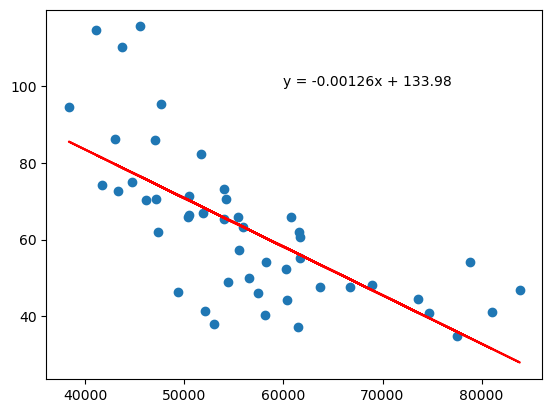

In [63]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["State Median Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 100),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-0.002842232609187835
The correlation coefficient is -0.31189


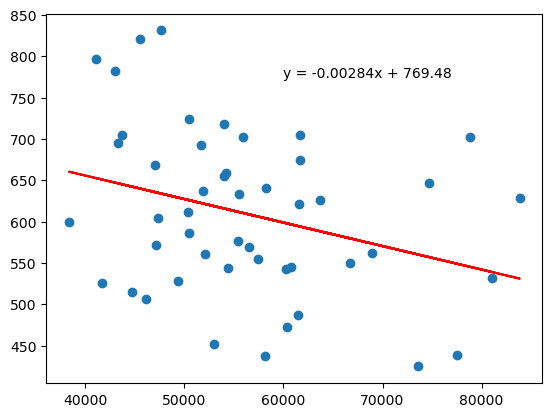

In [62]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 65 years and older")].groupby("State")
x = data["State Median Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 775),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-0.0003043455682683757
The correlation coefficient is -0.64209


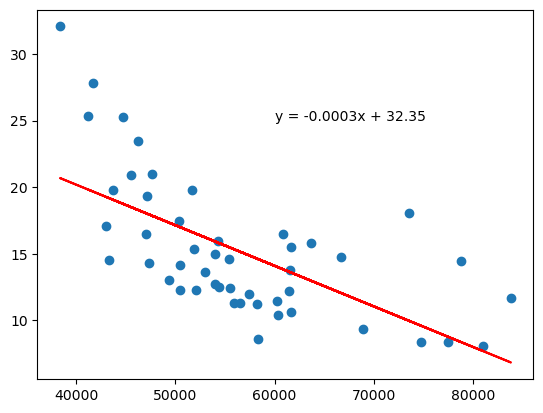

In [65]:
data = df[(df["Disease Type"] == "Stroke") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["State Median Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 25),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-0.0017787631274733633
The correlation coefficient is -0.55624


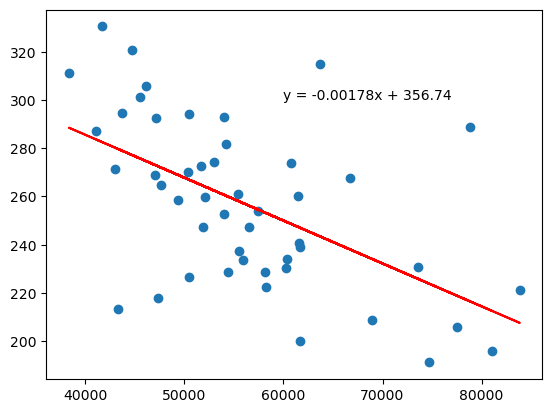

In [67]:
data = df[(df["Disease Type"] == "Stroke") & (df["Age Group"] == "Ages 65 years and older")].groupby("State")
x = data["State Median Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 300),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-1.4560596766799239
The correlation coefficient is -0.29065


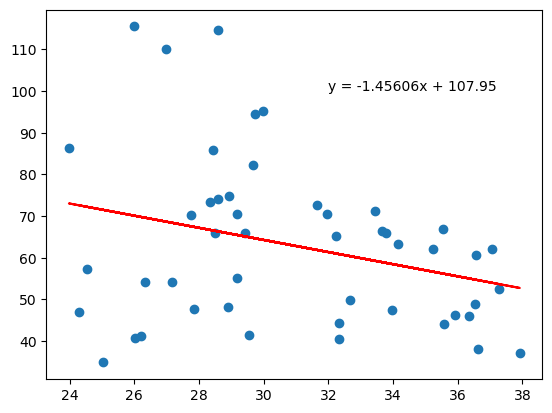

In [80]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% College/Associate's Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (32, 100),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-4.387035071485798
The correlation coefficient is -0.78143


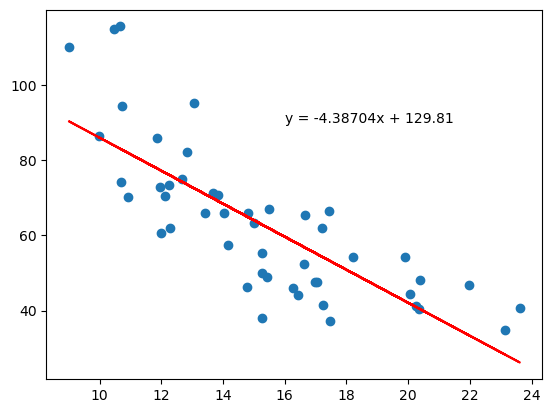

In [79]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% Bachelor Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (16, 90),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-3.763366067545003
The correlation coefficient is -0.59292


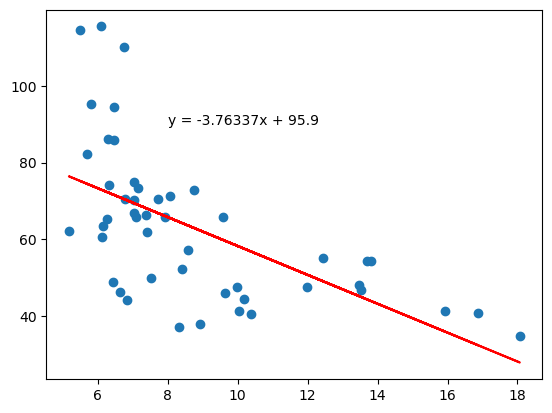

In [77]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% Graduate Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (8, 90),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

2.955469250985867
The correlation coefficient is 0.68304


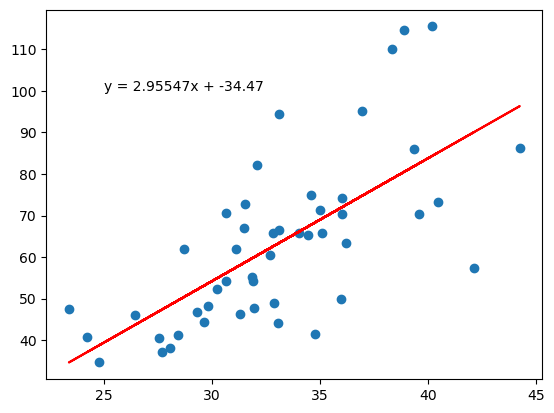

In [75]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% Only HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (25, 100),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

3.9277919900722575
The correlation coefficient is 0.72213


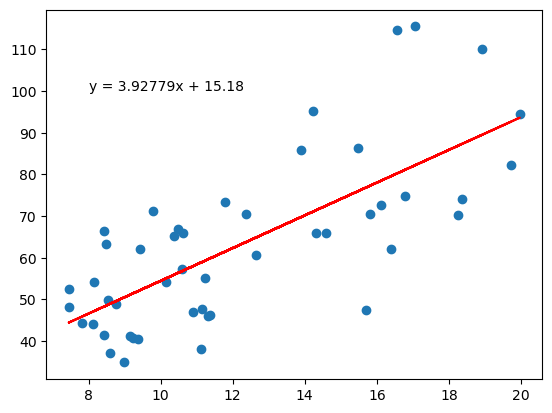

In [74]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% less than a HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (8, 100),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")